<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/Quick_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!gdown 1sj4VboAuonsDHsOqe5RzwXu1JXLbUNHi

Downloading...
From: https://drive.google.com/uc?id=1sj4VboAuonsDHsOqe5RzwXu1JXLbUNHi
To: /content/Sample Images.zip
100% 708k/708k [00:00<00:00, 109MB/s]


In [6]:
!unzip SampleImages.zip

Archive:  SampleImages.zip
  inflating: 11-356_27_7168_1024_img.jpg  
  inflating: 11-356_27_7168_1024_mask.jpg  
  inflating: 56Nx_12_116_4_4096_0_img.jpg  
  inflating: 56Nx_12_116_4_4096_0_mask.jpg  


In [7]:
!mkdir imgs

In [9]:
cp *.jpg imgs

In [36]:
import os
from glob import glob
from torch.utils.data import Dataset
import numpy as np
import torchvision.transforms as transforms
from PIL import Image
from torchvision.transforms import InterpolationMode


class HPDataset(Dataset):
    def __init__(self, root, transform_img=None, transform_mask=None):
        self.transform_img=transform_img
        self.transform_mask=transform_mask
        self.dir_all = []
        self.dir_all.extend(glob(os.path.join(root,'*img.jpg')))

    def __len__(self):
        return len(self.dir_all)

    def __getitem__(self, idx):
        image = Image.open(self.dir_all[idx]).convert("RGB")
        mask_path = self.dir_all[idx].replace('_img','_mask')
        mask = Image.open(mask_path)
        image = self.transform_img(image)

        mask = self.transform_mask(mask)
        sample = dict(image=image, mask=mask)
        return sample

transform_img = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )
    ])

transform_mask = transforms.Compose([
    transforms.Resize((512, 512), interpolation=InterpolationMode.NEAREST),
    transforms.ToTensor(),
    ])

root = '/content/imgs'

dataset = HPDataset(root=root, transform_img=transform_img, transform_mask=transform_mask)
dataloader_train =
dataloader_test =
sample = dataset[0]

sample['image'].shape, sample['mask'].shape, sample['mask'].unique()
# for sample in dataset:
#     print(sample)


(torch.Size([3, 512, 512]), torch.Size([1, 512, 512]), tensor([0., 1.]))

In [30]:
mask = Image.open ('/content/imgs/11-356_27_7168_1024_mask.jpg')
mask = np.array(mask)
np.unique(mask)

array([  0, 255], dtype=uint8)

In [11]:
root = '/content/imgs'
glob(os.path.join(root,'*img.jpg'))

['/content/imgs/11-356_27_7168_1024_img.jpg',
 '/content/imgs/56Nx_12_116_4_4096_0_img.jpg']

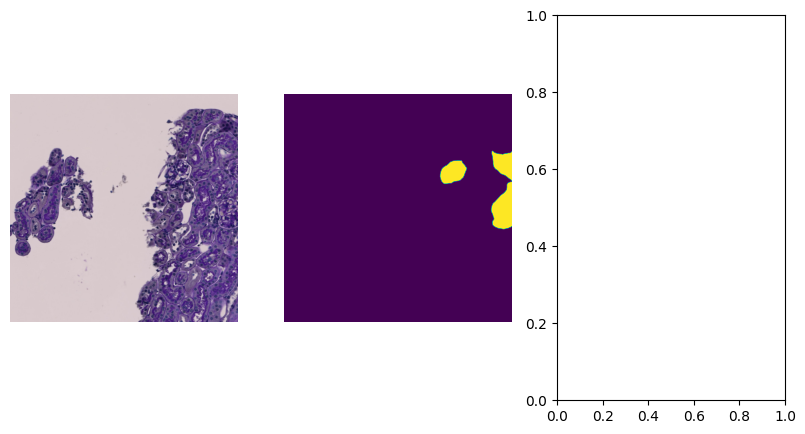

In [ ]:
# prompt: display jpg images as subplots

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

img1 = mpimg.imread('/content/11-356_27_7168_1024_img.jpg')
img2 = mpimg.imread('/content/11-356_27_7168_1024_mask.jpg')
#img3 = mpimg.imread('image3.jpg')

ax[0].imshow(img1)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].axis('off')
#ax[2].imshow(img3)
#ax[2].axis('off')

plt.show()


In [ ]:
# prompt: display 2 jpg images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


fig, ax = plt.subplots(1, 2, figsize=(10, 5))

img1 = mpimg.imread('/content/image1.jpg')
img2 = mpimg.imread('/content/image2.jpg')

ax[0].imshow(img1)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].axis('off')

plt.show()
